# Missing Values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_in_csv(file):
  return pd.read_csv(file)

## Drop the unnamed column

In [3]:
def drop_columns(data):
  data.drop('Unnamed: 0', axis=1, inplace=True)

## Check which columns have empty values

In [4]:
def handle_missing_values(data):
  columns_with_null = data.isnull().sum() > 0
  columns_with_null = columns_with_null[columns_with_null].index

  for column in columns_with_null:
    data[column].fillna(data[column].mean(), inplace=True)

  # for column in columns_with_null:
  #   correlation = data_without_types.corr()[column]
  #   column_to_average = correlation[correlation.abs() > 0.5].index
  #   data[column].fillna(data[column_to_average].mean(axis=1), inplace=True)

## Handle outliers

In [5]:
def handle_outlying_values(data):
  data_without_types = data.drop(columns=['Type'])
  for column in data_without_types.columns:
    data[column] = data[column].clip(lower=data[column].quantile(0.05), upper=data[column].quantile(0.95))

In [6]:
def visualise_outlying_values(data):
    num_features = len(data.columns)
    cols = 4  
    rows = (num_features + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
    axes = axes.flatten() 
    
    for i, feature in enumerate(data.columns):
        sns.boxplot(ax=axes[i], x=data[feature])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

## Normalise data

In [7]:
def normalise_data(data):
  data_without_types = data.drop(columns=['Type'])
  data_without_types = (data_without_types - data_without_types.mean()) / data_without_types.std()
  data[data_without_types.columns] = data_without_types

## Encode types

In [8]:
def encode_categorical_data(data):
    type_encodings = {
        'REGULAR': 0,
        'MAMRA': 1,
        'SANORA': 2
    }
    data['Type'] = data['Type'].map(type_encodings)

# Perform data preprocessing

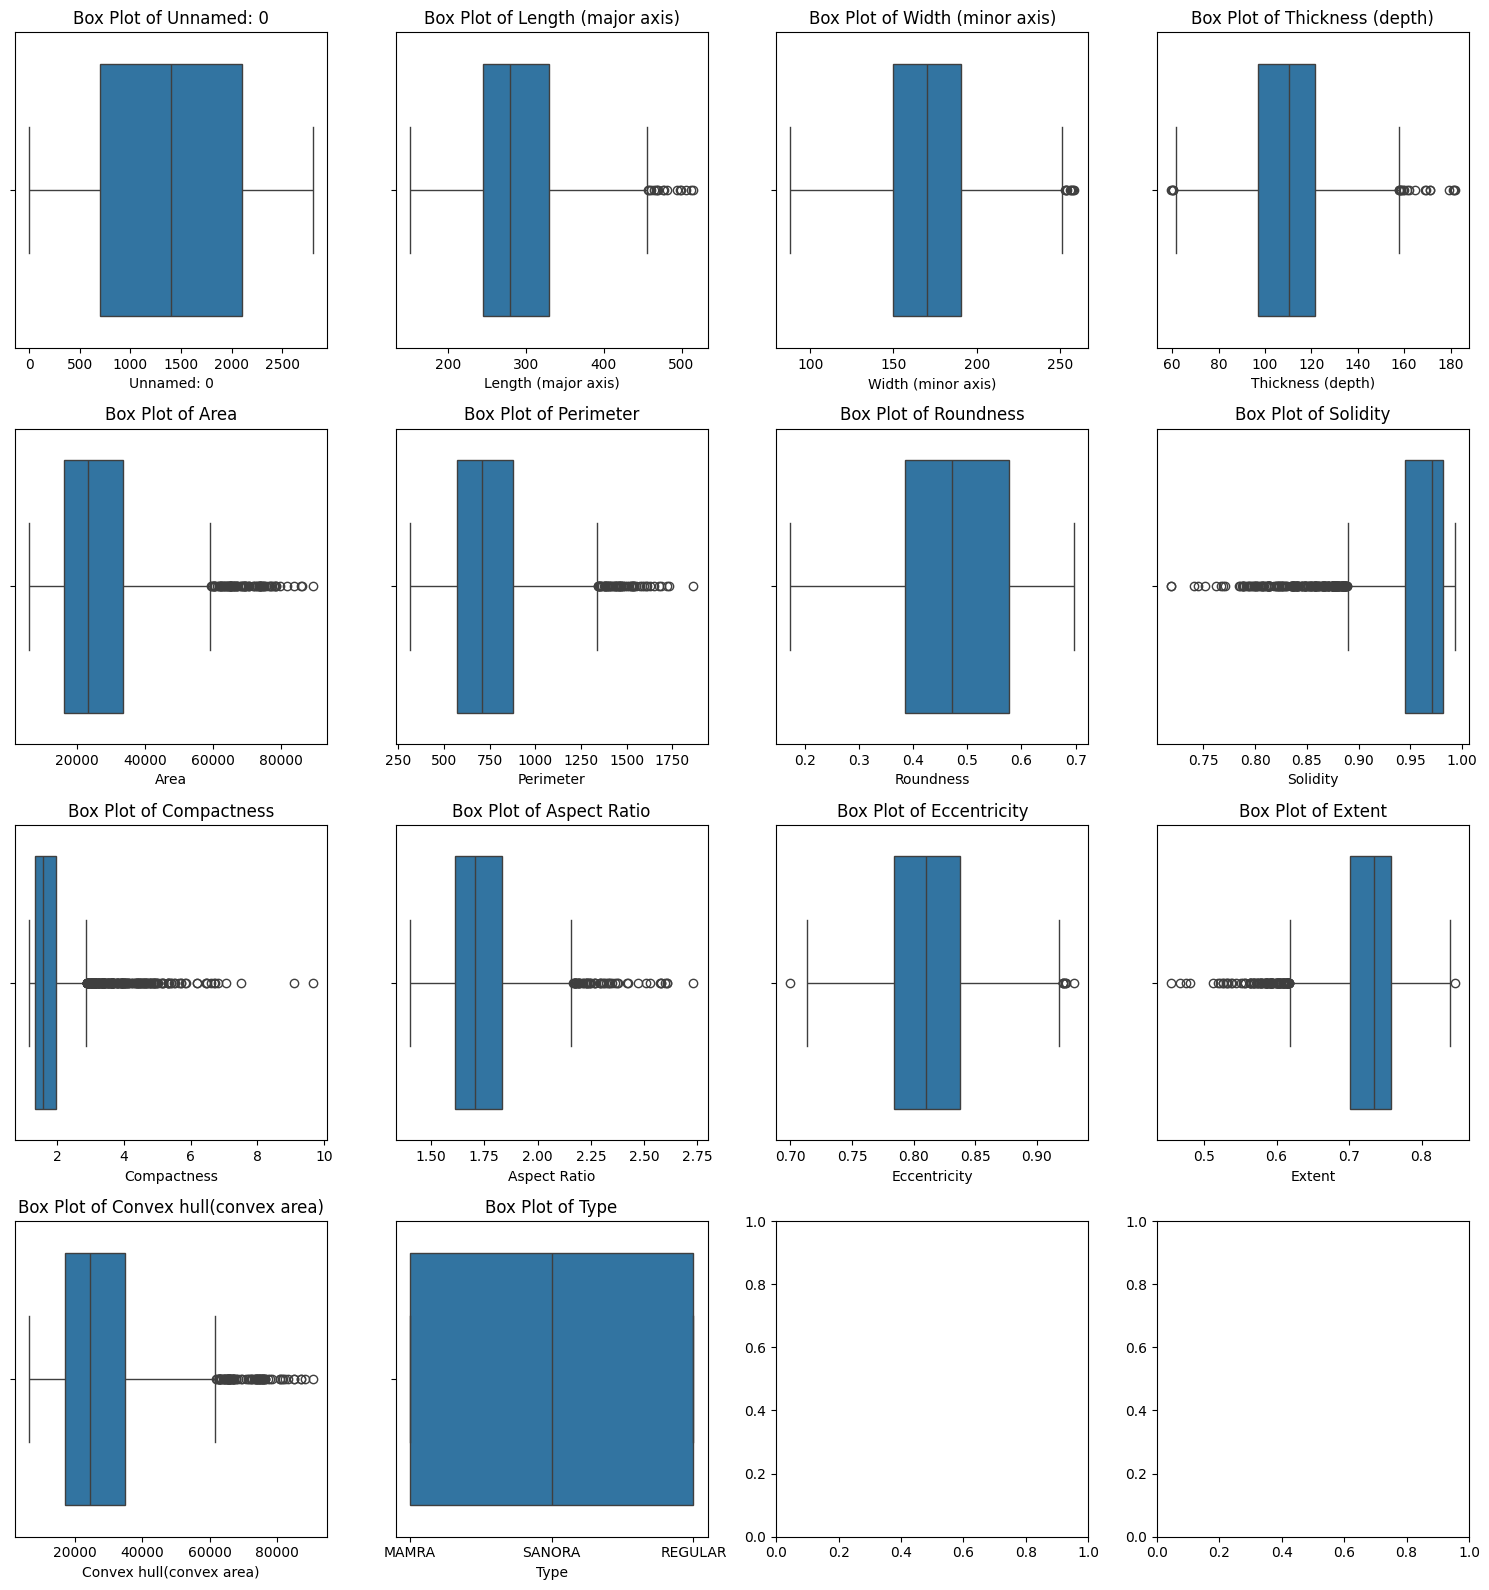

C:\Users\robof\AppData\Local\Temp\ipykernel_11776\4038975902.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


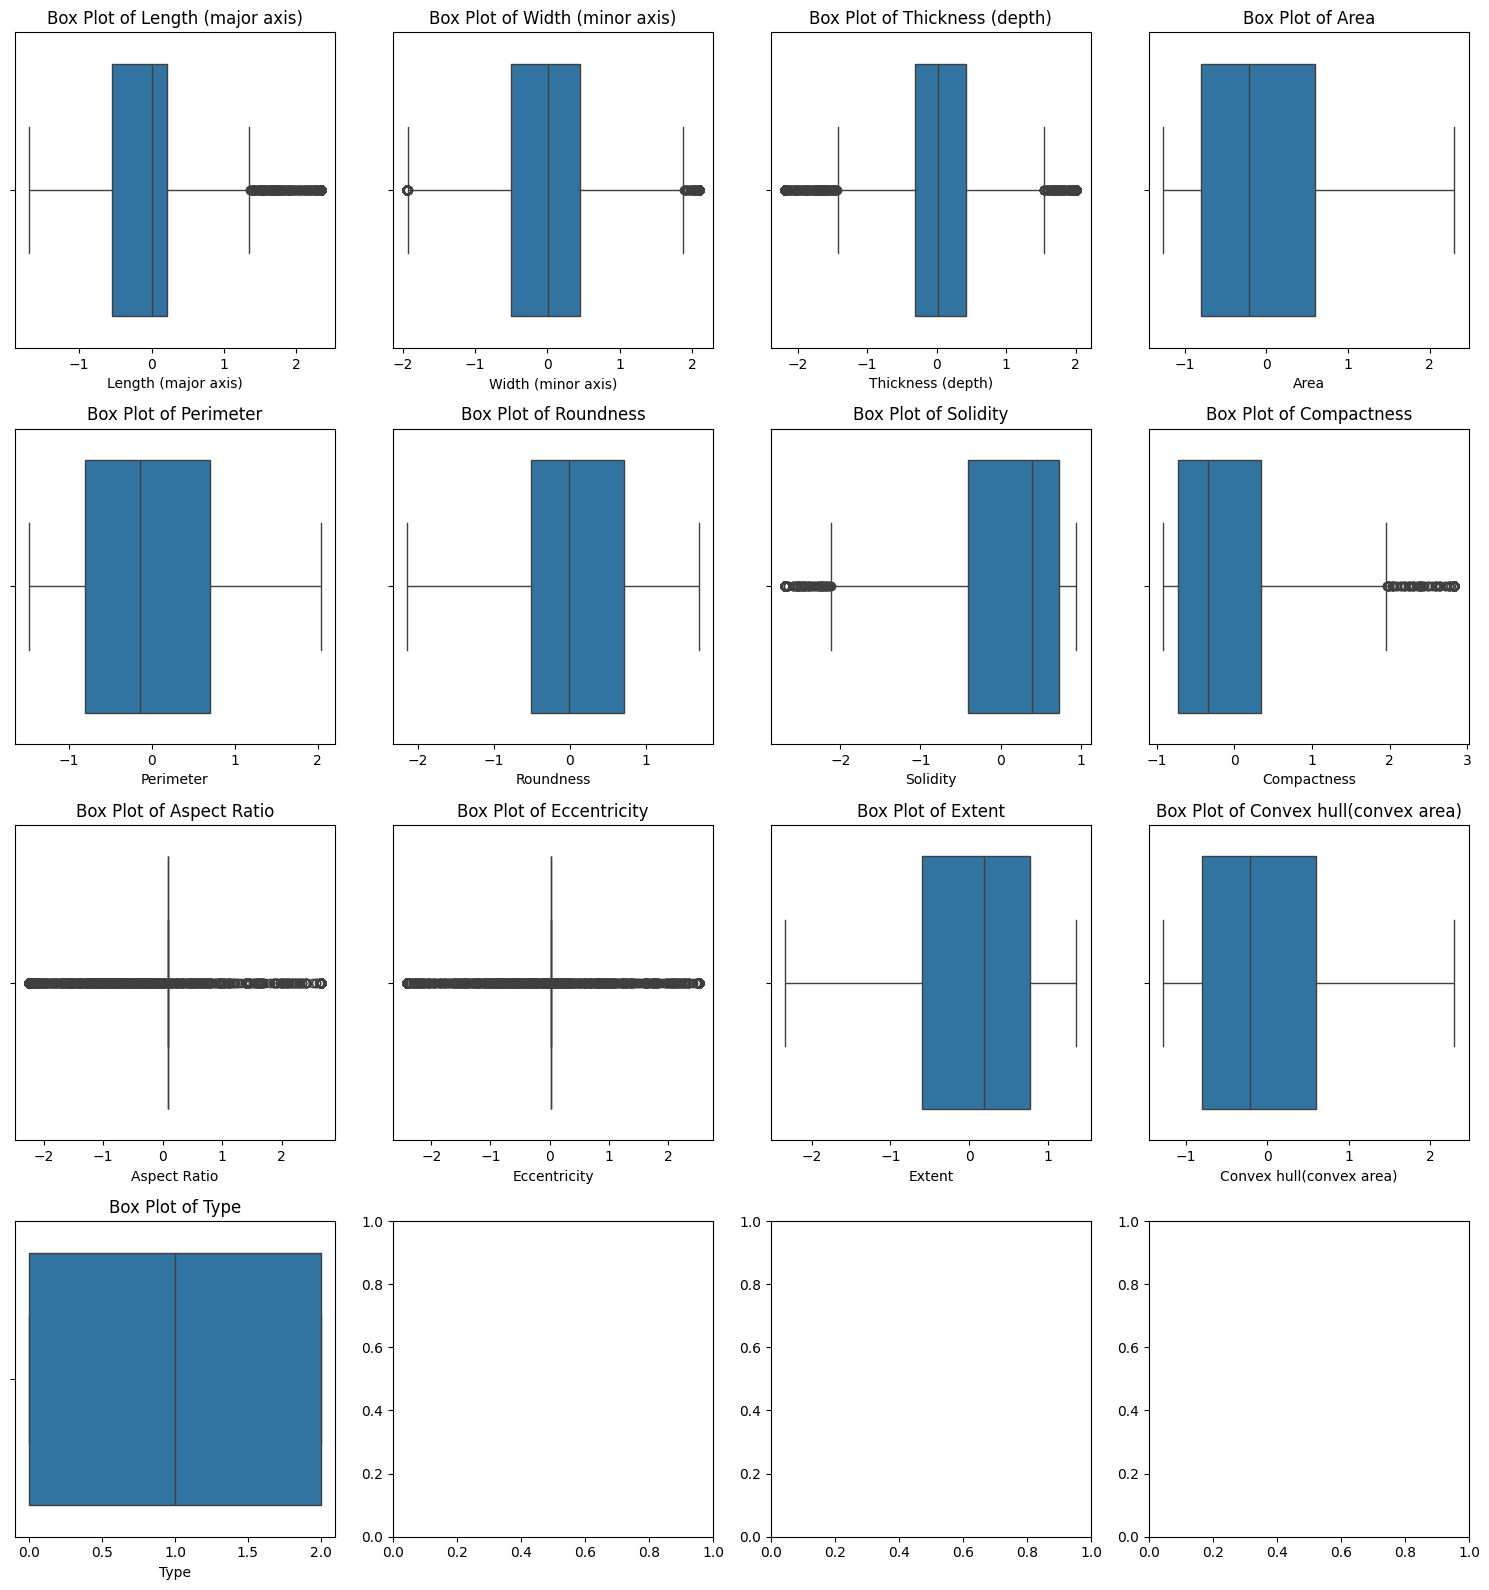

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.011967,2.088679,1.399665,-0.282664,-0.453769,-0.005893,0.477094,-0.547133,0.089672,0.024669,-1.097065,-0.316359,1
1,0.011967,2.088679,1.433423,-0.248560,-0.271516,-0.005893,-0.017483,-0.294208,0.089672,0.024669,-1.704301,-0.251066,1
2,0.011967,2.088679,1.249222,-0.301588,-0.438423,-0.005893,0.289057,-0.495156,0.089672,0.024669,-1.037727,-0.323733,1
3,0.011967,2.088679,1.258594,-0.285960,-0.368387,-0.005893,0.234982,-0.401426,0.089672,0.024669,-0.995187,-0.304728,1
4,0.011967,2.088679,-0.172215,-0.571694,-0.546782,-0.005893,-0.197557,-0.245674,0.089672,0.024669,-0.275485,-0.568427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,0.011967,1.051797,0.985523,-0.620245,-0.407034,-0.005893,-0.826557,0.123499,0.089672,0.024669,-0.008069,-0.584238,2
2799,0.011967,0.742810,0.705917,-0.722639,-0.758368,-0.005893,-0.158897,-0.360461,0.089672,0.024669,-0.294644,-0.724012,2
2800,0.011967,0.740007,0.739513,-0.698465,-0.627813,-0.005893,-0.278392,-0.153527,0.089672,0.024669,-0.172831,-0.693494,2
2801,0.011967,0.857991,0.853516,-0.663425,-0.517772,-0.005893,-0.401773,-0.007323,0.089672,0.024669,0.296354,-0.651385,2


In [10]:
def perform_preprocessing():
  data = read_in_csv('../Data/Almond.csv')
  visualise_outlying_values(data)
  drop_columns(data)
  handle_missing_values(data)
  handle_outlying_values(data)
  normalise_data(data)
  encode_categorical_data(data)
  visualise_outlying_values(data)

  return data

perform_preprocessing()